In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapezoid, simpson, solve_ivp

# Projekt 2 numerisk integration

In [14]:
def angular_velocity(t, w, w_0, y):
    t = np.array(t)
    return np.abs(((y*w_0**2)/(w_0**2-w**2))*(w_0*np.sin(w_0*t) - w*np.sin(w*t)))

def trapezoid_sol(T, N, w, w_0, y):
    t = np.linspace(0, T, N)
    y = angular_velocity(t, w, w_0, y)
    return trapezoid(y, x=t)

def third_rule_error_trapezoid(T, N, w, w_0, y):
    t1 = np.linspace(0, T, N)
    y1 = angular_velocity(t1, w, w_0, y)
    t2 = np.linspace(0, T, 2*N)
    y2 = angular_velocity(t2, w, w_0, y)

    return np.abs((trapezoid(y1, x=t1) - trapezoid(y2, x=t2))/3)

def simpson_sol(T, N, w, w_0, y):
    t = np.linspace(0, T, N)
    y = angular_velocity(t, w, w_0, y)
    return simpson(y, x=t)

def fifthenth_rule_error_simpson(T, N, w, w_0, y):
    t1 = np.linspace(0, T, N)
    y1 = angular_velocity(t1, w, w_0, y)
    t2 = np.linspace(0, T, 2*N)
    y2 = angular_velocity(t2, w, w_0, y)

    return np.abs((simpson(y1, x=t1) - simpson(y2, x=t2))/15)

def func2(t, u, w, w_0, B, y):
	a, b = u
	da_dt = b
	db_dt = -w_0**2 * np.sin(a) - 2*B*b + y*w_0**2*np.cos(w*t)
	return np.array([da_dt, db_dt])
    

## Deluppgift 1

12.038


/tmp/ipykernel_4739/33279493.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral_value, error = quad(angular_velocity, 0, 10, args=(w,w_0,y))


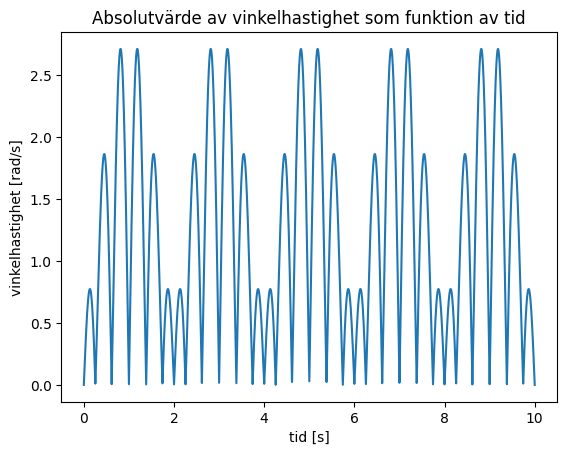

In [25]:
t = np.linspace(0, 10, 4000)
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

fig, ax = plt.subplots()
ax.plot(t, angular_velocity(t, w,w_0,y))
ax.set_xlabel('tid [s]')
ax.set_ylabel('vinkelhastighet [rad/s]')
ax.set_title('Absolutvärde av vinkelhastighet som funktion av tid')
integral_value, error = quad(angular_velocity, 0, 10, args=(w,w_0,y))

print(round(integral_value, 3))


0.1273


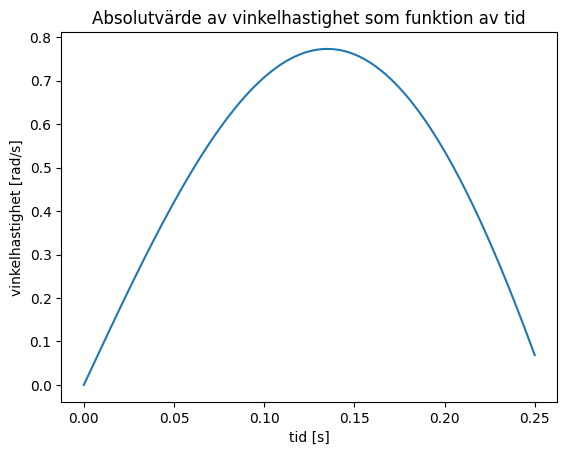

In [24]:
t = np.linspace(0, 0.25, 200)
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

fig, ax = plt.subplots()
ax.plot(t, angular_velocity(t, w,w_0,y))
ax.set_xlabel('tid [s]')
ax.set_ylabel('vinkelhastighet [rad/s]')
ax.set_title('Absolutvärde av vinkelhastighet som funktion av tid')

integral_value, error = quad(angular_velocity, 0, 0.25, args=(w,w_0,y))

print(round(integral_value, 4))


## Deluppgift 2

In [28]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (100, 200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = trapezoid_sol(10, step, w, w_0, y)
    eN[step] = third_rule_error_trapezoid(10, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue

print(f'valueN:{valueN}, eN:{eN} qN:{qN}')

valueN:{100: 12.042533554878652, 200: 12.03547873879093, 400: 12.032339610251993, 800: 12.032854324843248}, eN:{100: 0.0023516053625739866, 200: 0.0010463761796456101, 400: 0.00017157153041817233, 800: 2.5187377932075112e-05} qN:{200: 1.168244368997405, 400: 2.6085195185346257, 800: 2.768037333369721}


In [29]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = simpson_sol(10, step, w, w_0, y)
    eN[step] = fifthenth_rule_error_simpson(10, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue

print(f'valueN:{valueN}, eN:{eN} qN:{qN}')

valueN:{200: 12.03958572534059, 400: 12.033293959968987, 800: 12.033087768044508}, eN:{200: 0.000419451024773565, 400: 1.374612829856403e-05, 800: 1.673376975380355e-05} qN:{400: 4.931405136047279, 800: -0.28373715991958764}


In [31]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (100, 200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = trapezoid_sol(0.25, step, w, w_0, y)
    eN[step] = third_rule_error_trapezoid(0.25, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue
    
print(f'valueN:{valueN}, eN:{eN} qN:{qN}')

valueN:{100: 0.12726849220585393, 200: 0.12727656542226934, 400: 0.1272785601402751, 800: 0.12727905590839242}, eN:{100: 2.691072138470233e-06, 200: 6.649060019237041e-07, 400: 1.6525603910300113e-07, 800: 4.1193460466789254e-08} qN:{200: 2.016958759571936, 400: 2.0084474061236928, 800: 2.0042157640626734}


In [30]:
w = 2*np.pi
w_0= 3*np.pi
y = 0.1

steps = (200, 400, 800)
valueN = {}
eN = {}
qN = {}

for step in steps:
    valueN[step] = simpson_sol(0.25, step, w, w_0, y)
    eN[step] = fifthenth_rule_error_simpson(0.25, step, w, w_0, y)

for step in steps:
    try:
        qN[int(step*2)] = np.log2(eN[step]/eN[int(step*2)])
    except:
        continue

print(f'valueN:{valueN}, eN:{eN} qN:{qN}')

valueN:{200: 0.12727922074646209, 400: 0.12727922062183225, 800: 0.1272792206140928}, eN:{200: 8.308655615370715e-12, 400: 5.159631980925875e-13, 800: 3.21446573063137e-14} qN:{400: 4.0092749882755, 800: 4.004617291386089}


## Deluppgift 3

In [ ]:
T = 40

f = np.array([0,0])
tspan = (0,T)

w = 2*np.pi
w_0 = (3/2)*w
B = (1/4)*w_0
y = 1.07

SOL = solve_ivp(func2, tspan, f, method='RK45', args=(w, w_0, B, y))

SOL

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04 ...  3.996e+01  4.000e+01]
        y: [[ 0.000e+00  4.751e-07 ...  5.367e+00  6.005e+00]
            [ 0.000e+00  9.502e-03 ...  1.656e+01  1.871e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 2996
     njev: 0
      nlu: 0

In [ ]:
trapezoid(SOL.y[0],SOL.t)

286.01149820479145